<a href="https://colab.research.google.com/github/Abhishekauti21/Abhi_Heisenberg/blob/master/abhi_Heisenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [ ]:
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [ ]:
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [ ]:
df_train.shape

(52310, 11)

In [ ]:
df_test.shape

(22421, 10)

In [ ]:
df_copy = df_train.copy()
df_copy[df_copy['Age'] == 118]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
46,9156,JWT,Airlines,Online,Value Plan,49,INDIA,31.0,12.40,118,0
88,2814,JWT,Airlines,Online,Value Plan,22,INDIA,50.0,20.00,118,0
109,4207,JWT,Airlines,Online,Value Plan,46,INDIA,31.0,12.40,118,0
132,7086,JWT,Airlines,Online,Value Plan,89,INDIA,117.0,46.80,118,0
156,2890,JWT,Airlines,Online,Value Plan,68,INDIA,180.0,72.00,118,0
...,...,...,...,...,...,...,...,...,...,...,...
52049,9704,JWT,Airlines,Online,Value Plan,3,INDIA,31.0,12.40,118,0
52078,8849,JWT,Airlines,Online,Value Plan,4,INDIA,31.0,12.40,118,0
52208,2829,JWT,Airlines,Online,Value Plan,9,INDIA,31.0,12.40,118,0
52213,8297,JZI,Airlines,Online,Value Plan,70,UNITED STATES,0.0,25.55,118,0


In [ ]:
df_copy[df_copy['Duration'] < 0]


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,7015,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,4193,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,7763,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [ ]:
df_copy[df_copy['Duration'] > 550]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
382,9512,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0
2609,4476,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.00,54.19,36,0
7766,4113,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,0
14544,3927,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,0
22123,3165,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,0
31985,5697,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,0
33701,6734,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,0
43158,5331,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,0
47791,3123,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,0
48880,4682,SSI,Airlines,Online,Ticket Protector,4784,SINGAPORE,0.32,0.09,48,0


In [ ]:
df_train.drop(df_train[df_train['Duration'] > 550].index,inplace= True)
df_train.drop(df_train[df_train['Duration'] < 0].index,inplace= True)
df_train.drop(df_train[df_train['Age'] <= 0].index,inplace= True)
df_train.drop(df_train[df_train['Net Sales'] < 0].index,inplace= True)

In [ ]:
df_train.skew()

ID                     -0.001994
Duration                2.687733
Net Sales               2.811635
Commision (in value)    3.535454
Age                     2.948093
Claim                   1.788105
dtype: float64

In [ ]:
df_test.nunique()

ID                      8226
Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Duration                 397
Destination               97
Net Sales               3082
Commision (in value)    2459
Age                       85
dtype: int64

In [ ]:
df_train.nunique()

ID                      7992
Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Duration                 427
Destination               97
Net Sales               6698
Commision (in value)    5099
Age                       98
Claim                      2
dtype: int64

In [ ]:
df_train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

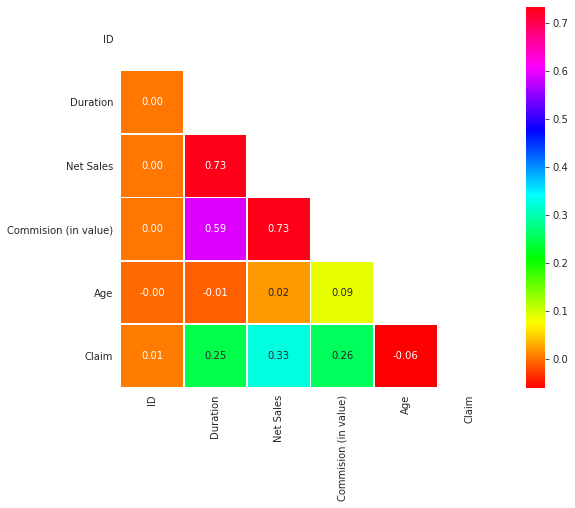

In [ ]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

In [ ]:
df_train['Claim'].value_counts()

0    43574
1     8720
Name: Claim, dtype: int64

Cancellation Plan                  13254
2 way Comprehensive Plan           10555
Rental Vehicle Excess Insurance     6813
Bronze Plan                         4723
Basic Plan                          4038
Name: Product Name, dtype: int64

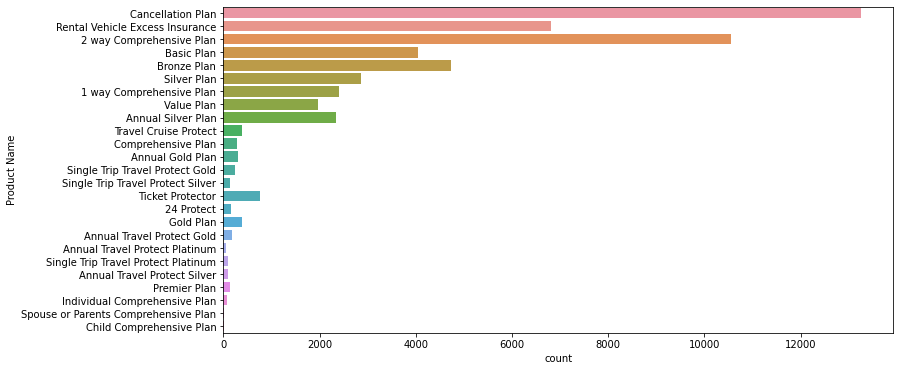

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='Product Name', data=df_train)
df_train['Product Name'].value_counts().head()

Text(0.5, 1.0, 'Claim diagram')

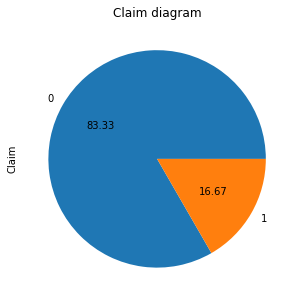

In [ ]:
df_train['Claim'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Claim diagram')

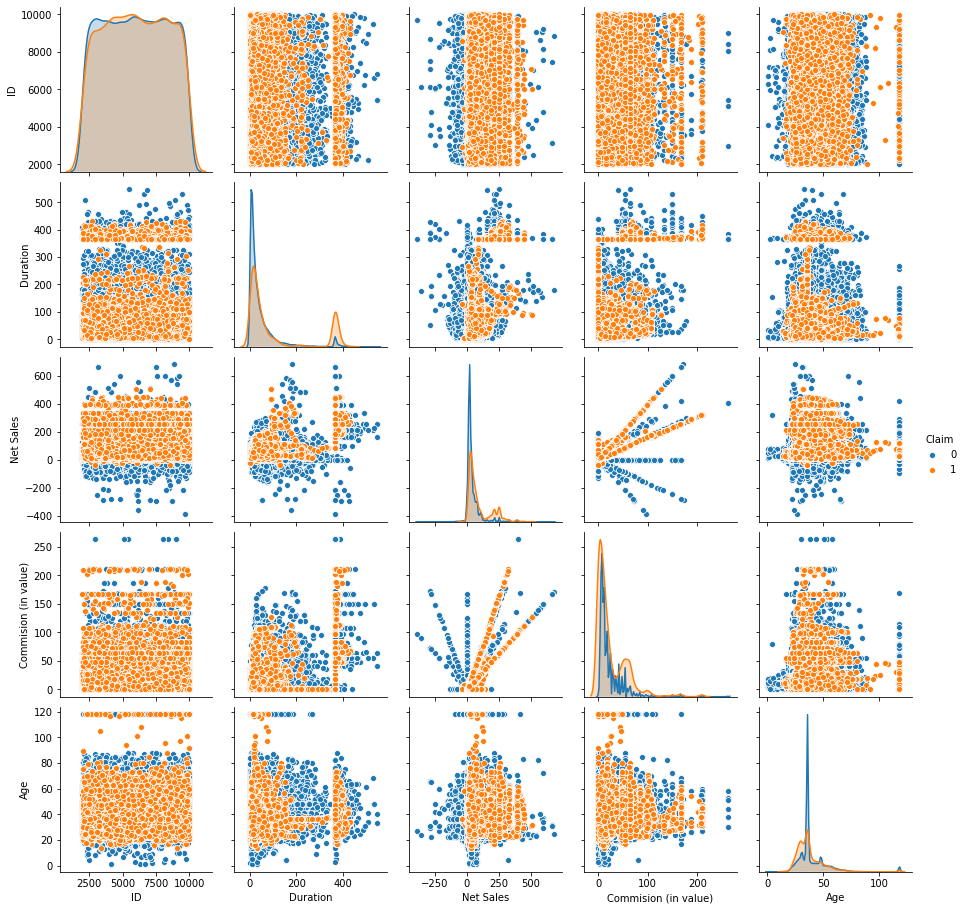

In [ ]:
cat=df_train.select_dtypes('object')
val=df_train.select_dtypes(['int64','float64'])
sns.pairplot(val,hue='Claim')

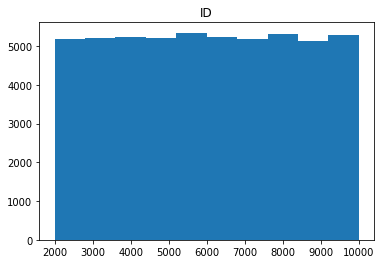

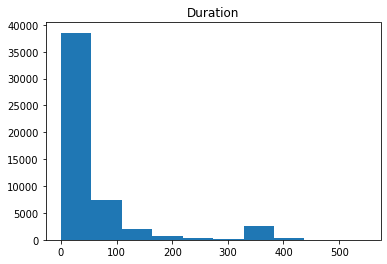

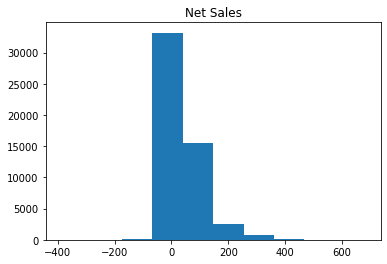

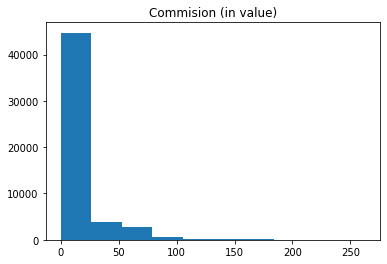

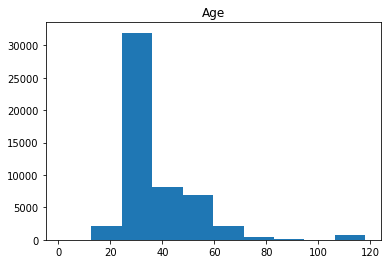

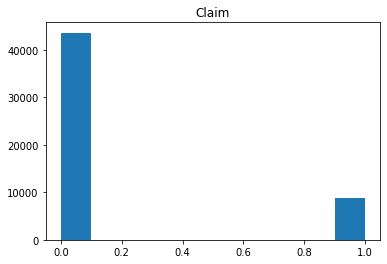

In [ ]:
for i in val:
  plt.title(i)
  plt.hist(val[i])
  plt.show()

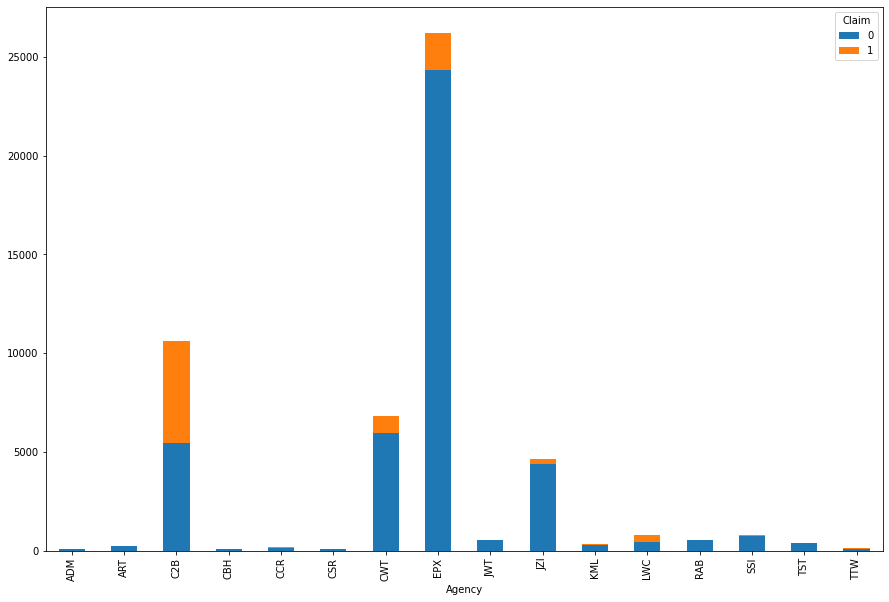

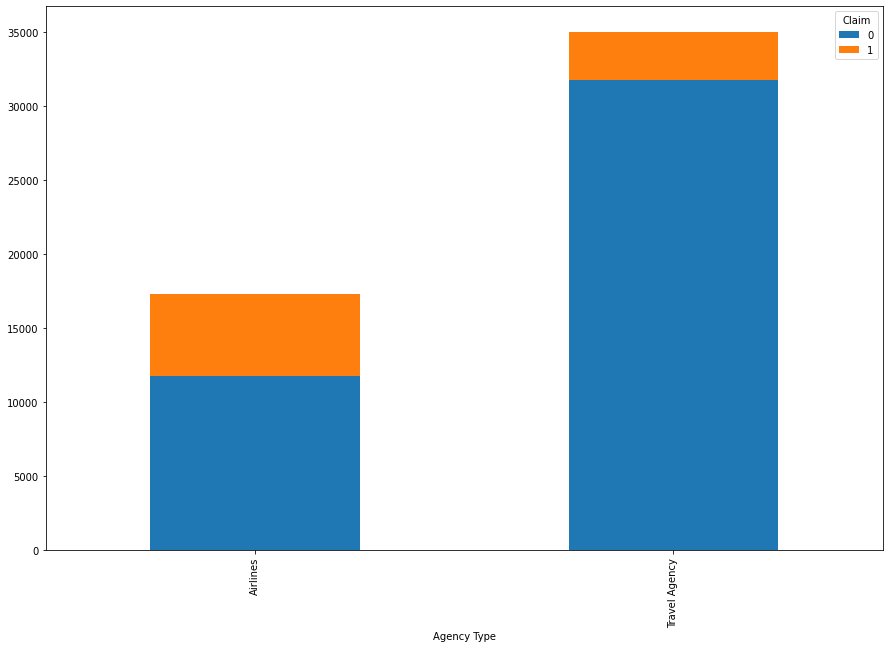

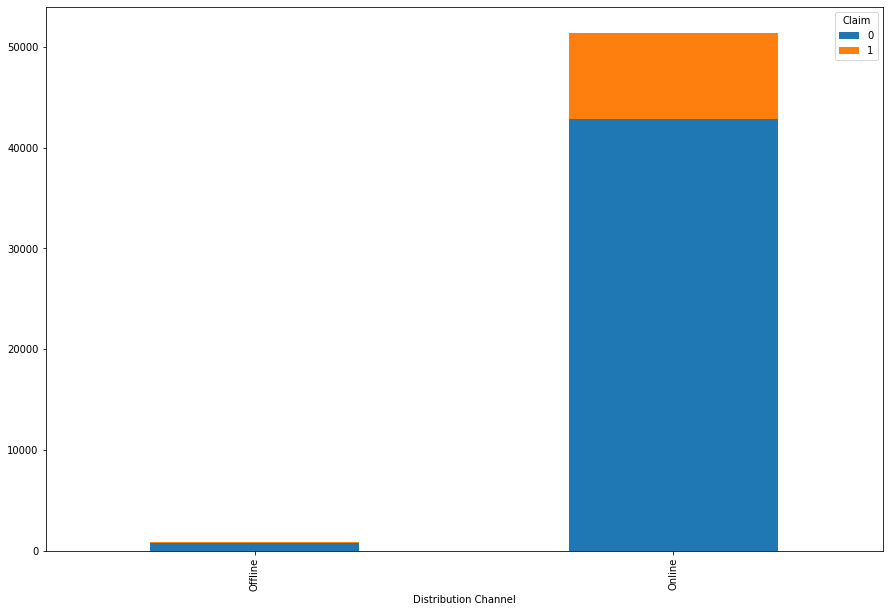

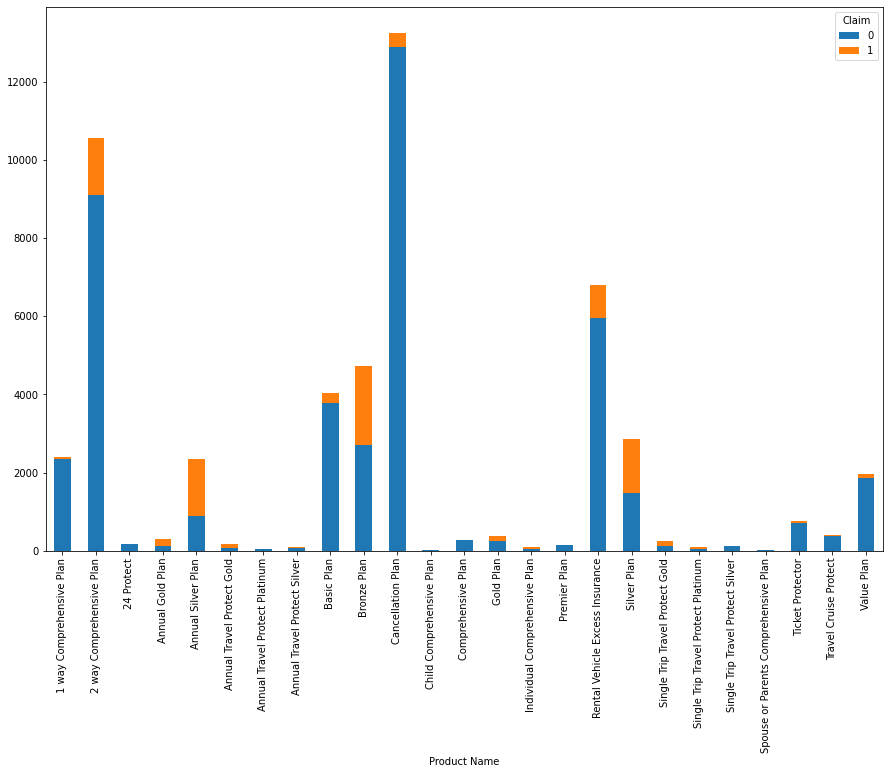

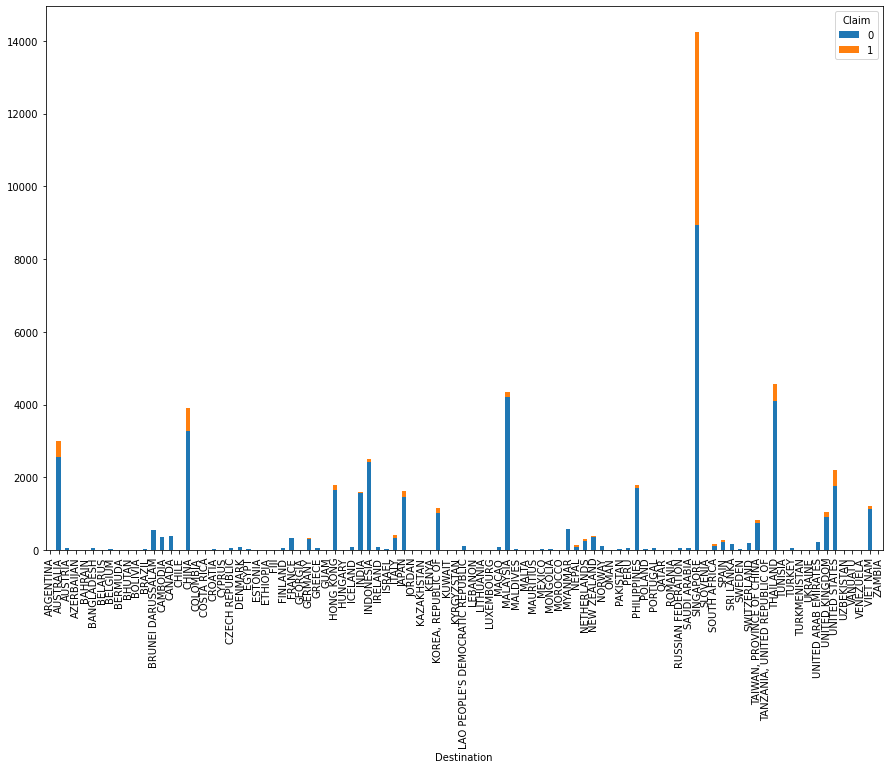

In [ ]:
for i in cat:
  df_train.groupby(i)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,10))


In [ ]:
# Bucketize age groups
df_copy = df_train.copy()
bins = [0, 30, 40, 50, 60, 100]
labels = [20, 30, 40, 50, 60]
df_copy['age_group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

In [ ]:
count_age_response_pct = pd.crosstab(df_copy['Claim'], df_copy['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [ ]:
age = pd.DataFrame(df_copy['age_group'].value_counts())
age['% applied for claim'] = age['age_group']*100/age['age_group'].sum()
age['% got the Claim'] = count_age_response_pct[1]
age.drop('age_group', axis = 1, inplace = True)
age['age'] = [30, 40, 20, 50, 60]
age = age.sort_values('age',ascending = True)

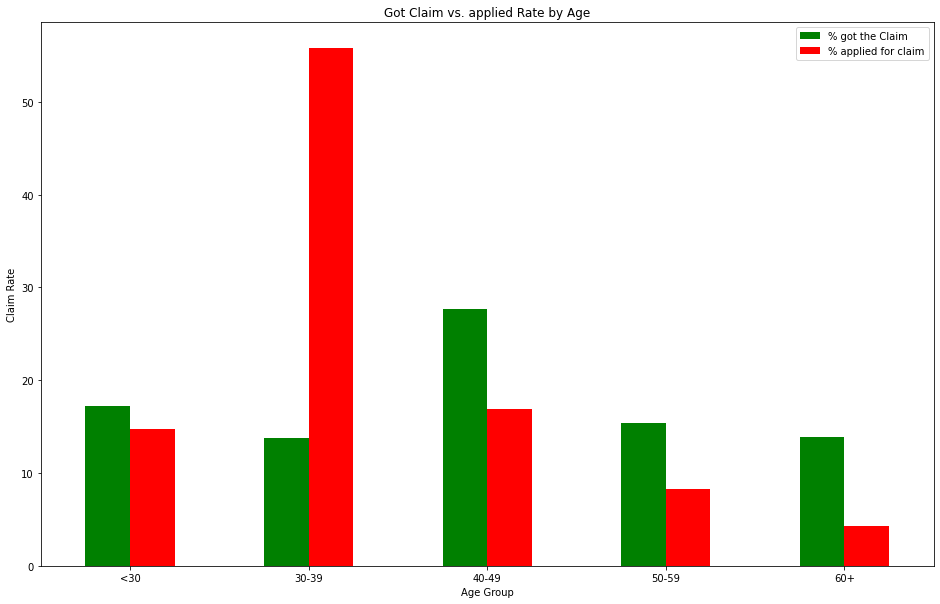

In [ ]:
plot_age = age[['% got the Claim','% applied for claim']].plot(kind = 'bar',
                                              figsize=(16,10), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Claim Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Got Claim vs. applied Rate by Age')
plt.show()

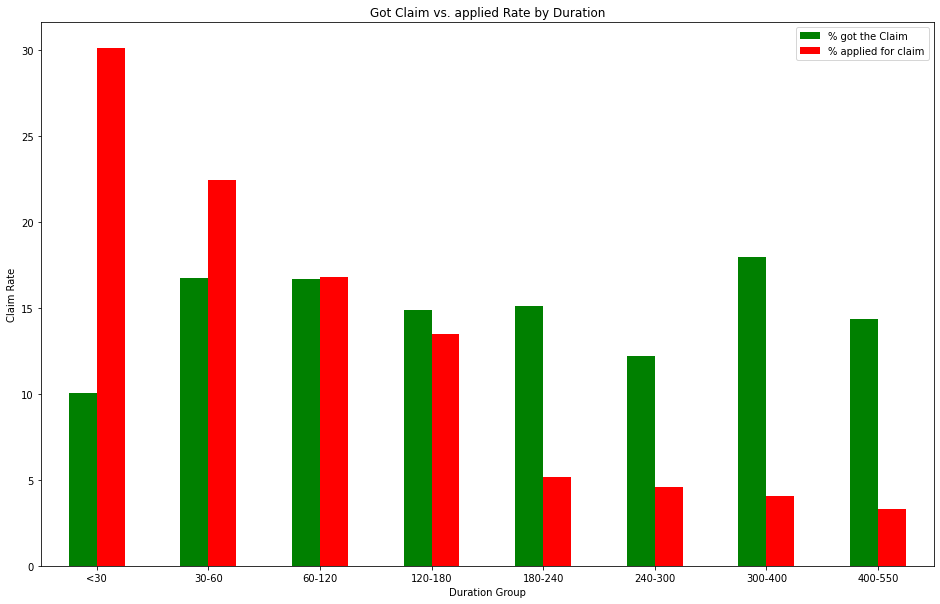

In [ ]:
df_copy = df_train.copy()
bins = [0,10,20,30,50,60,70,80,100]
labels = [30,60,120,180,240,300,400,550]
df_copy['Duration_group'] = pd.cut(df_copy['Duration'], bins=bins, labels=labels)
count_dur_response_pct = pd.crosstab(df_copy['Claim'], df_copy['Duration_group']).apply(lambda x: x/x.sum() * 100)
count_dur_response_pct = count_dur_response_pct.transpose() 
dur = pd.DataFrame(df_copy['Duration_group'].value_counts())
dur['% applied for claim'] = dur['Duration_group']*100/dur['Duration_group'].sum()
dur['% got the Claim'] = count_dur_response_pct[1]
dur.drop('Duration_group', axis = 1, inplace = True)
dur['Duration'] = [30,60,120,180,240,300,400,550]
dur = dur.sort_values('Duration',ascending = True)
plot_duration = dur[['% got the Claim','% applied for claim']].plot(kind = 'bar',
                                              figsize=(16,10), color = ('green','red'))
plt.xlabel('Duration Group')
plt.ylabel('Claim Rate')
plt.xticks(np.arange(8), ('<30', '30-60', '60-120', '120-180', '180-240','240-300','300-400','400-550'),rotation = 'horizontal')
plt.title('Got Claim vs. applied Rate by Duration')
plt.show()

In [ ]:
df_copy = df_train.copy()
count_product_response_pct = pd.crosstab(df_copy['Claim'], df_copy['Product Name']).apply(lambda x: x/x.sum() * 100)
count_product_response_pct = count_product_response_pct.transpose()

Product Name
Annual Travel Protect Gold             65.573770
Annual Silver Plan                     61.823605
Annual Gold Plan                       58.305085
Single Trip Travel Protect Platinum    50.000000
Silver Plan                            48.357792
Single Trip Travel Protect Gold        48.207171
Individual Comprehensive Plan          44.047619
Bronze Plan                            42.769426
Gold Plan                              37.631579
Annual Travel Protect Silver           33.695652
Name: 1, dtype: float64

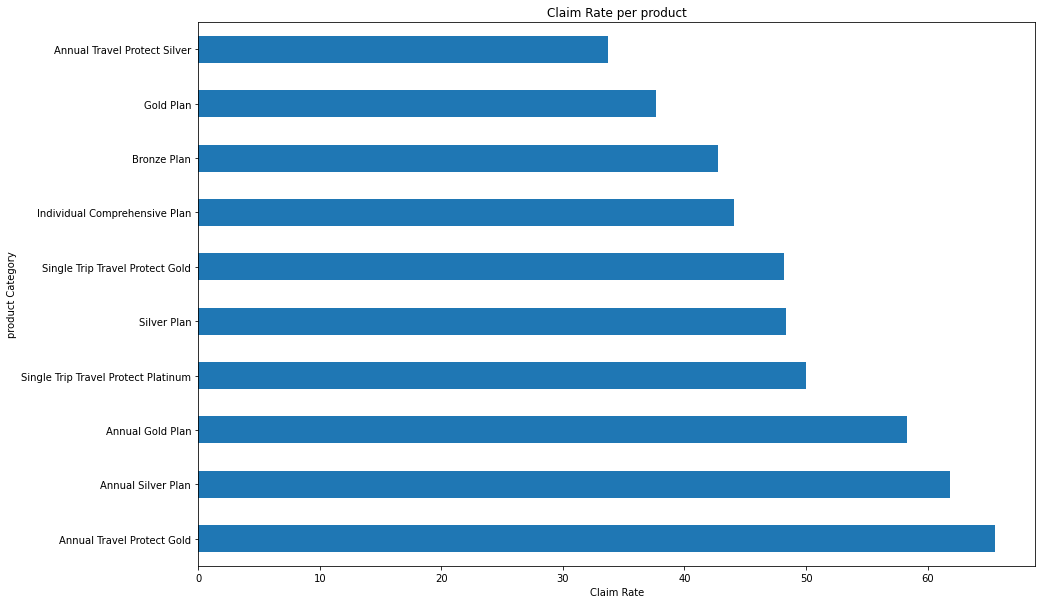

In [ ]:
plot_product = count_product_response_pct[1].sort_values(ascending = False)[:10].plot(kind ='barh', figsize = (15,10))
plt.title('Claim Rate per product')
plt.xlabel('Claim Rate')
plt.ylabel('product Category')   
count_product_response_pct[1].sort_values(ascending = False).head(10)                                          

Destination
SINGAPORE        37.282181
SOUTH AFRICA     33.333333
NEPAL            32.031250
COSTA RICA       25.000000
UNITED STATES    20.218579
ITALY            18.137255
NETHERLANDS      17.821782
TURKEY           17.741935
CHINA            16.423638
AUSTRALIA        15.111259
Name: 1, dtype: float64


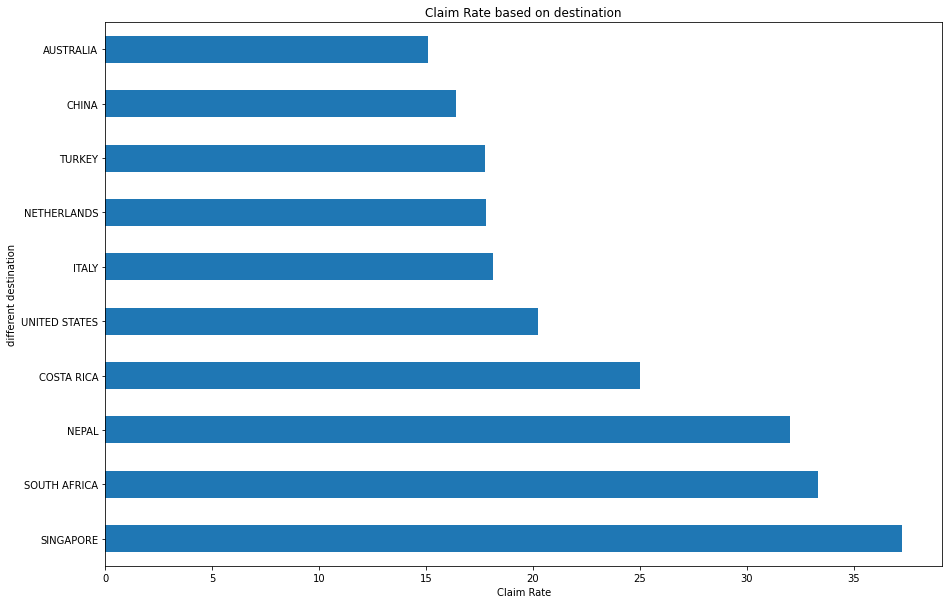

In [ ]:
df_copy = df_train.copy()
count_destination_response_pct = pd.crosstab(df_copy['Claim'], df_copy['Destination']).apply(lambda x: x/x.sum() * 100)
count_destination_response_pct = count_destination_response_pct.transpose()
plot_product = (count_destination_response_pct[1].sort_values(ascending = False)[:10].plot(kind ='barh', figsize = (15,10)))
plt.title('Claim Rate based on destination')
plt.xlabel('Claim Rate')
plt.ylabel('different destination')
print(count_destination_response_pct[1].sort_values(ascending = False).head(10))

Agency
C2B    48.775203
LWC    43.672457
TTW    36.538462
KML    15.015974
CWT    12.446793
SSI     7.392996
EPX     7.170646
CCR     6.410256
JWT     5.636364
JZI     5.547129
Name: 1, dtype: float64


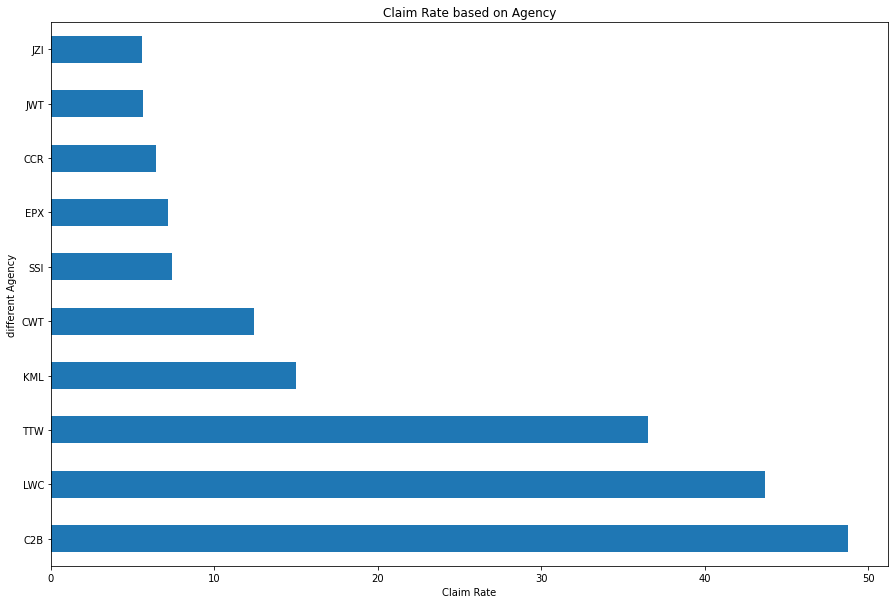

In [ ]:
df_copy = df_train.copy()
count_agency_response_pct = pd.crosstab(df_copy['Claim'], df_copy['Agency']).apply(lambda x: x/x.sum() * 100)
count_agency_response_pct = count_agency_response_pct.transpose()
plot_product = (count_agency_response_pct[1].sort_values(ascending = False)[:10].plot(kind ='barh', figsize = (15,10)))
plt.title('Claim Rate based on Agency')
plt.xlabel('Claim Rate')
plt.ylabel('different Agency')
print(count_agency_response_pct[1].sort_values(ascending = False).head(10))

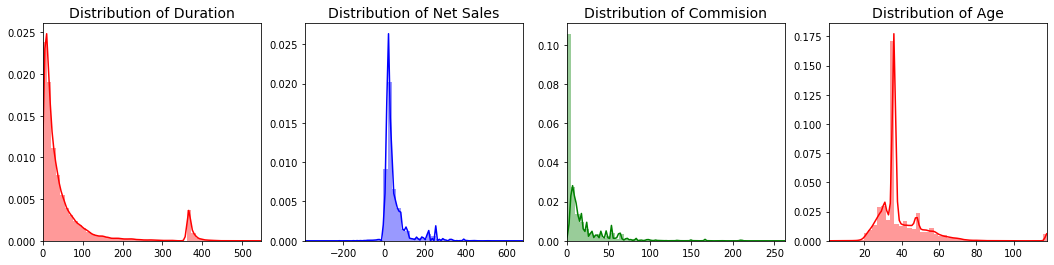

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

dur_val = df_train['Duration'].values
sales_val = df_train['Net Sales'].values
commision_val=df_train['Commision (in value)'].values
age_val=df_train['Age'].values

sns.distplot(dur_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Duration', fontsize=14)
ax[0].set_xlim([min(dur_val), max(dur_val)])

sns.distplot(sales_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Net Sales', fontsize=14)
ax[1].set_xlim([min(sales_val), max(sales_val)])


sns.distplot(commision_val, ax=ax[2], color='g')
ax[2].set_title('Distribution of Commision', fontsize=14)
ax[2].set_xlim([min(commision_val), max(commision_val)])

sns.distplot(age_val, ax=ax[3], color='r')
ax[3].set_title('Distribution of Age', fontsize=14)
ax[3].set_xlim([min(age_val), max(age_val)])


plt.show()

In [ ]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import scipy.stats as ss
from scipy.stats import chi2_contingency
 
class ChiSquare:
   def __init__(self, df_train):
       self.df = df_train
       self.p = None #P-Value
       self.chi2 = None #Chi Test Statistic
       self.dof = None
       self.dfObserved = None
       self.dfExpected = None
      
   def _print_chisquare_result(self, colX, alpha):
       result = ""
       if self.p<alpha:
           result="{0} is IMPORTANT for Prediction".format(colX)
       else:
           result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
 
       print(result)
      
   def TestIndependence(self,colX,colY, alpha=0.05):
       Xt = self.df[colX].astype(str)
       Yt = self.df[colY].astype(str)
      
       self.dfObserved = pd.crosstab(Yt,Xt)
       chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
       self.p = p
       self.chi2 = chi2
       self.dof = dof
      
       self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
      
       self._print_chisquare_result(colX,alpha)
 
 
 
 
 
 
Xt = df_train.drop(['Claim'], axis=1)
ct = ChiSquare(df_train)
for c in Xt.columns:
   ct.TestIndependence(c, 'Claim')


In [ ]:
# Categorical boolean mask
categorical_feature_mask =df_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_train.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))
df_train[categorical_cols].head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,7,1,1,10,68
1,7,1,1,10,53
2,6,1,1,16,84
3,7,1,1,1,33
4,7,1,1,1,53
5,7,1,1,1,84
6,7,1,1,10,90
7,9,0,1,8,95
8,7,1,1,1,16
9,2,0,1,9,75


In [ ]:
df_train=df_train.drop(columns=['ID','Distribution Channel','Agency Type','Agency'])
X=df_train.drop(columns=['Claim'])
y=df_train['Claim']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ors=RandomOverSampler(ratio=1)
X_train_res,y_train_res=ors.fit_sample(X,y)

In [ ]:
X_train_res.shape,y_train_res.shape


((87148, 6), (87148,))

In [ ]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('resampled dataset shape {}'.format(Counter(y_train_res)))

original dataset shape Counter({0: 43574, 1: 8720})
resampled dataset shape Counter({0: 43574, 1: 43574})


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_res,y_train_res,test_size=0.30,random_state=101)

In [ ]:
db = AdaBoostClassifier(RandomForestClassifier(),n_estimators=100,learning_rate=1)
db.fit(X_train,y_train)
db.score(X_test,y_test)


0.9798814304838401

In [ ]:
prediction = db.predict(X_test)
prec1 = precision_score(y_test,prediction)
prec1

0.9666567651863953

In [ ]:
etc=ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=-1, random_state=101, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
etc.fit(X_train,y_train)
etc.score(X_test,y_test)

0.9766303308471983

In [ ]:
prediction1 = etc.predict(X_test)
prec2 = precision_score(y_test,prediction1)
prec2

0.9591671571512654

In [ ]:
# Categorical boolean mask
categorical_feature_mask =df_test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda col: le.fit_transform(col))
df_test[categorical_cols].head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,7,1,1,10,33
1,7,1,1,0,75
2,2,0,1,9,75
3,7,1,1,1,82
4,2,0,1,17,75
5,2,0,1,9,75
6,7,1,1,1,95
7,2,0,1,9,75
8,6,1,1,16,28
9,7,1,1,10,41


In [ ]:
X1_test=df_test.drop(columns=['ID','Distribution Channel','Agency Type','Agency'])
pred = db.predict(X1_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_test['Claim']=pd.DataFrame(pred)

In [ ]:
df_test['Claim'].value_counts()

0    18755
1     3666
Name: Claim, dtype: int64

In [ ]:
df_test.head(10)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,17631,7,1,1,10,192,33,18.0,0.00,36,0
1,15064,7,1,1,0,2,75,20.0,0.00,36,0
2,14139,2,0,1,9,13,75,13.5,3.38,24,0
3,19754,7,1,1,1,133,82,41.0,0.00,36,0
4,16439,2,0,1,17,2,75,30.0,7.50,32,0
5,12394,2,0,1,9,13,75,13.5,3.38,41,0
6,12499,7,1,1,1,120,95,23.0,0.00,36,0
7,13938,2,0,1,9,57,75,60.0,15.00,33,1
8,11747,6,1,1,16,29,28,0.0,5.94,58,0
9,14015,7,1,1,10,18,41,56.0,0.00,36,0


Text(0.5, 1.0, 'Claim diagram')

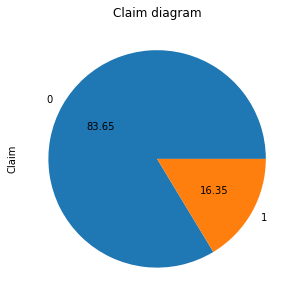

In [ ]:
df_test['Claim'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Claim diagram')

In [ ]:
output=df_test[['ID','Claim']]
output.head()

,ID,Claim
0,17631,0
1,15064,0
2,14139,0
3,19754,0
4,16439,0


In [ ]:
output.to_csv('Heisenberg_056.csv', index=False)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.score(X_test,y_test)

0.6766112067316886

In [ ]:
prediction2 = logmodel.predict(X_test)
precision_score(y_test,prediction2)


0.7256275539988325

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9718110537387645

In [ ]:
predict = rf.predict(X_test)
prec = precision_score(y_test,predict)
prec

0.9514102002045887

In [ ]:
#logistic
recall_score(y_test,prediction2)

0.5696173527839303

In [ ]:
#randomforest
recall_score(y_test,predict)

0.9971740624761323

In [ ]:
#extratrees
recall_score(y_test,prediction1)

0.9957229053692813

In [ ]:
#adaboost(with random forest)
recall_score(y_test,prediction)

0.9941953715725961

In [ ]:
#logistic
roc_auc_score(y_test,prediction2)

0.6767792556135405

In [ ]:
#randomforest
roc_auc_score(y_test,predict)

0.9732652414740454

In [ ]:
#extratrees
roc_auc_score(y_test,prediction1)

0.9766003432761209

In [ ]:
#adaboost(with random forest)
roc_auc_score(y_test,prediction)

0.9798972567332793

In [ ]:
#adaboost(with random forest)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)


array([[12603,   449],
       [   76, 13017]])